# Part 1 – Executive Summary



This should be a summary of what the report contains – the problem you are solving, why it’s important, the ML methods you have used and a summary of your results and conclusions.

# Part 2 – Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import files

In [2]:
# uploaded= files.upload()
data_set = pd.read_csv('COMP1801_CourseworkDataset1_tabular.csv')
display(data_set.head())
print(data_set.describe())

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,284.161690,Blade,colGrain,25,4.460592,7.937116,22,0,7,Top,Investment
1,1599.551748,Blade,singleGrain,9,1.425973,2.432948,2,0,0,Bottom,Die
2,768.311031,Nozzle,colGrain,26,2.508879,3.841211,25,0,0,Bottom,Investment
3,1697.663828,Blade,colGrain,12,3.248913,2.610700,10,0,0,Bottom,Continuous
4,1491.478862,Nozzle,colGrain,20,1.901670,4.634926,24,0,0,Top,Die


          Lifespan  coolingRate   quenchTime    forgeTime  smallDefects  \
count  1000.000000  1000.000000  1000.000000  1000.000000    1000.00000   
mean   1366.373468    17.480000     2.786059     5.497136      13.37100   
std     519.026551     7.557958     1.320935     2.613501       8.07047   
min     115.120563     5.000000     0.501046     1.017799       0.00000   
25%     960.976320    11.000000     1.608916     3.203739       8.00000   
50%    1470.377014    17.000000     2.824488     5.510765      16.00000   
75%    1757.165684    24.000000     3.902389     7.735951      20.00000   
max    2380.142759    30.000000     4.990795     9.988511      33.00000   

       largeDefects  sliverDefects  
count   1000.000000    1000.000000  
mean       0.117000       0.286000  
std        0.565359       1.351307  
min        0.000000       0.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        0.000000       0.000000  
max        4.000000      10.

<ipython-input-8-ffdc7247f05a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_set.corr()


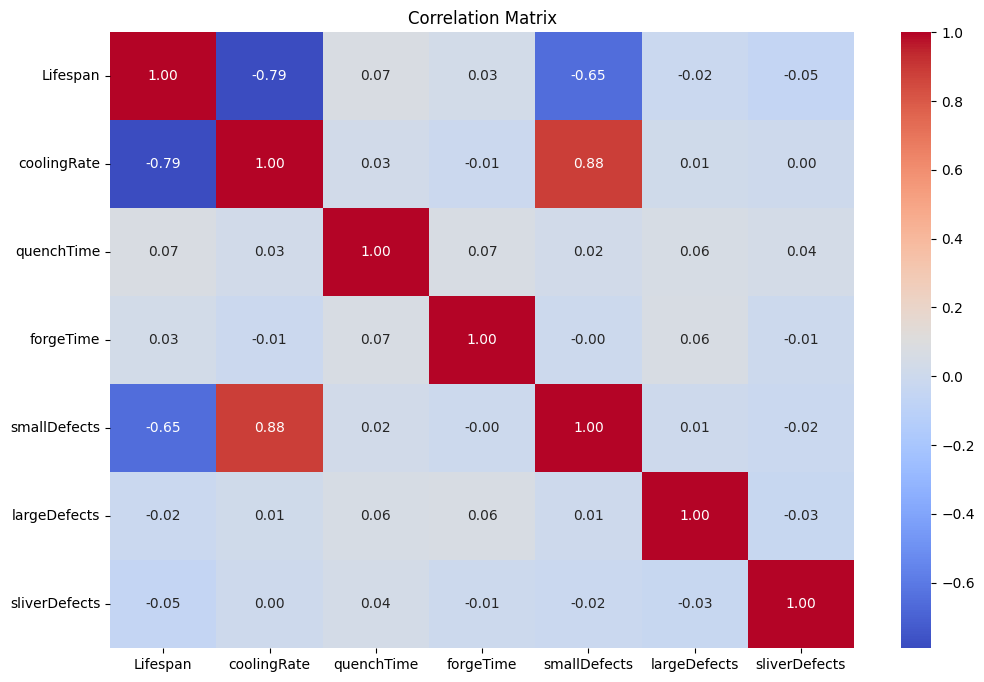

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data_set.corr()

# Plot a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

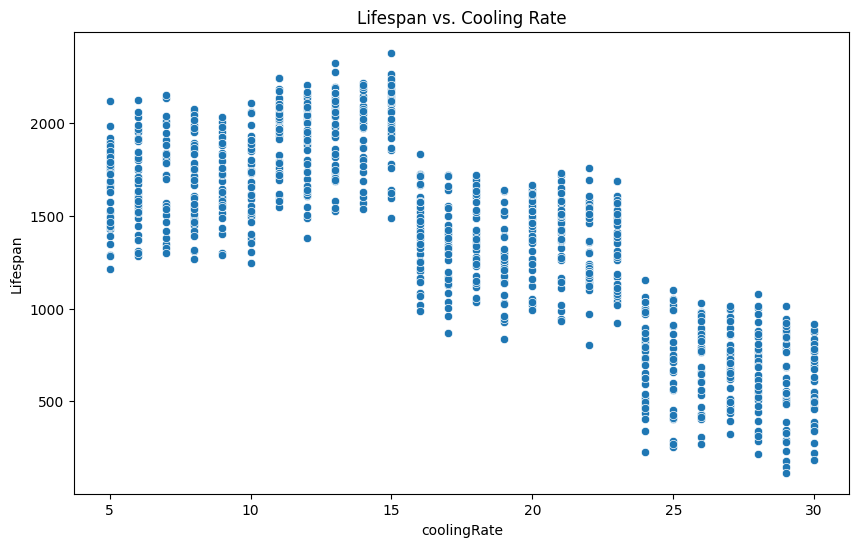

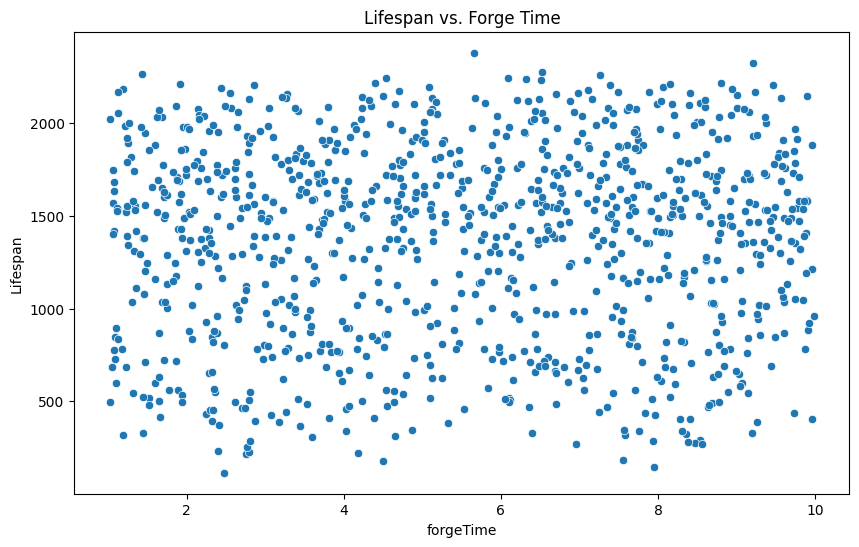

In [ ]:
# Scatter plot of Lifespan vs. Cooling Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='coolingRate', y='Lifespan', data=data_set)
plt.title('Lifespan vs. Cooling Rate')
plt.show()

# Scatter plot of Lifespan vs. Forge Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='forgeTime', y='Lifespan', data=data_set)
plt.title('Lifespan vs. Forge Time')
plt.show()

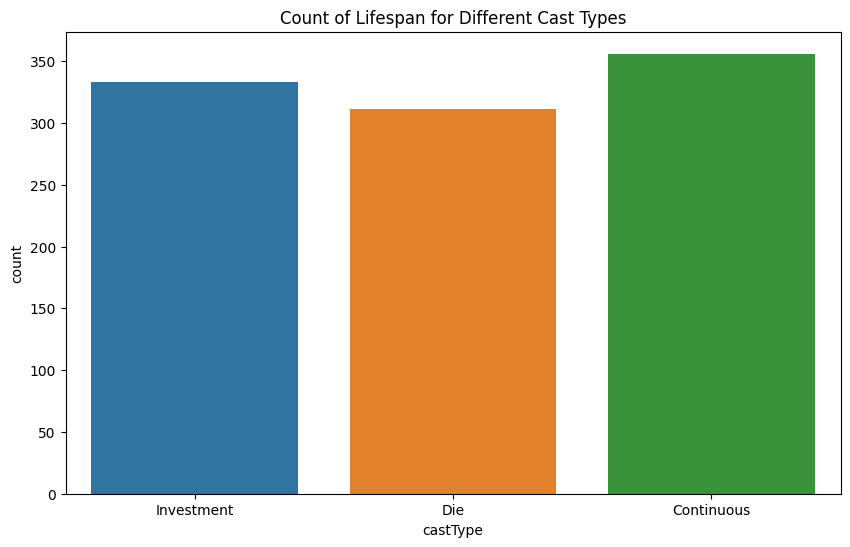

In [ ]:
# Count plot of Lifespan for different 'castType'
plt.figure(figsize=(10, 6))
sns.countplot(x='castType', data=data_set)
plt.title('Count of Lifespan for Different Cast Types')
plt.show()

# Part 3 – Regression Implementation

In [1]:
#importing all necessary libraries
import numpy as np
import pandas as pd

from  sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from google.colab import files

import matplotlib.pyplot as plt

In [2]:
#loading the data
uploaded = files.upload()
original_data = pd.read_csv('COMP1801_CourseworkDataset1_tabular.csv')
display(original_data.head())

Saving COMP1801_CourseworkDataset1_tabular.csv to COMP1801_CourseworkDataset1_tabular.csv


,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,284.161690,Blade,colGrain,25,4.460592,7.937116,22,0,7,Top,Investment
1,1599.551748,Blade,singleGrain,9,1.425973,2.432948,2,0,0,Bottom,Die
2,768.311031,Nozzle,colGrain,26,2.508879,3.841211,25,0,0,Bottom,Investment
3,1697.663828,Blade,colGrain,12,3.248913,2.610700,10,0,0,Bottom,Continuous
4,1491.478862,Nozzle,colGrain,20,1.901670,4.634926,24,0,0,Top,Die


In [3]:
# Encoding features
dataset_for_part3 = original_data.copy()
label_encoder = LabelEncoder()
dataset_for_part3["mcrstr"] = label_encoder.fit_transform(dataset_for_part3['microstructure'])
dataset_for_part3["partTypeLabel"] = label_encoder.fit_transform(dataset_for_part3['partType'])
dataset_for_part3["castTypeLabel"] = label_encoder.fit_transform(dataset_for_part3['castType'])
dataset_for_part3["seedLocationLabel"] = label_encoder.fit_transform(dataset_for_part3['seedLocation'])
display(dataset_for_part3.head())

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType,mcrstr,partTypeLabel,castTypeLabel,seedLocationLabel
0,284.161690,Blade,colGrain,25,4.460592,7.937116,22,0,7,Top,Investment,0,0,2,1
1,1599.551748,Blade,singleGrain,9,1.425973,2.432948,2,0,0,Bottom,Die,2,0,1,0
2,768.311031,Nozzle,colGrain,26,2.508879,3.841211,25,0,0,Bottom,Investment,0,2,2,0
3,1697.663828,Blade,colGrain,12,3.248913,2.610700,10,0,0,Bottom,Continuous,0,0,0,0
4,1491.478862,Nozzle,colGrain,20,1.901670,4.634926,24,0,0,Top,Die,0,2,1,1


**Regression Implementation using Linear Regression Model**

In [4]:
#Selecting features and initializing hyperparameters, preprecessors
target = ["Lifespan"]
features = ["coolingRate", "partTypeLabel"] # "coolingRate", "partTypeLabel", "quenchTime", "forgeTime", "smallDefects", "mcrstr", "castTypeLabel", "seedLocationLabel"

#choosing degree 3 to try
poly = PolynomialFeatures(degree=3)
scaler = StandardScaler()

X =  np.array(dataset_for_part3[features])
y = np.array(dataset_for_part3[target])

# Standardize target
scaler.fit(y)
y_std = scaler.transform(y)

#splitting out data to train, validation and train sets
X_non_test, X_test, y_non_test, y_test = train_test_split(X, y_std, test_size=0.20, shuffle=True, random_state=0)
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X_non_test, y_non_test, test_size=0.25, shuffle=True, random_state=0)

MSE on training data: 0.11816316434227182
MSE on validation data: 0.11268704754375375
R2 score on the training data: 0.8762957833632061
R2 score on the validation data: 0.8908387575369852


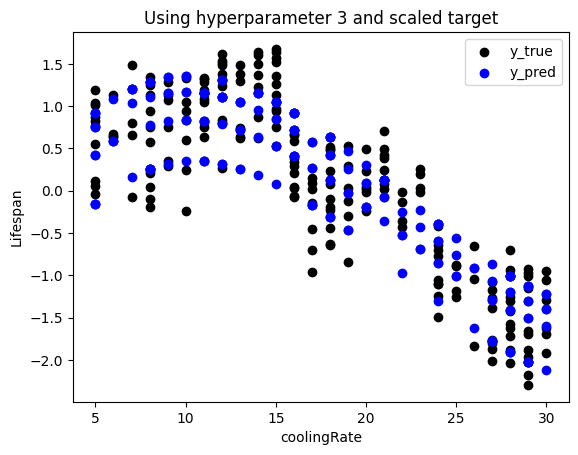

In [5]:
# Initializing models
model = LinearRegression()

# Training
poly.fit(X_train_raw)
X_train_poly = poly.transform(X_train_raw)

scaler.fit(X_train_poly)
X_train = scaler.transform(X_train_poly)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)


# Validation
poly.fit(X_valid_raw)
X_valid_poly = poly.transform(X_valid_raw)

scaler.fit(X_valid_poly)
X_valid = scaler.transform(X_valid_poly)

model.fit(X_valid, y_valid)

y_valid_pred = model.predict(X_valid)
mse_valid = mean_squared_error(y_valid, y_valid_pred)

print('MSE on training data:', mse_train)
print('MSE on validation data:', mse_valid)
print("R2 score on the training data:", r2_score(y_train, y_train_pred), )
print("R2 score on the validation data:", r2_score(y_valid, y_valid_pred), )

X_valid_disp = X_valid_raw[:, 0]

plt.scatter(X_valid_disp, y_valid,  color='black', label='y_true') # Observed y values
plt.scatter(X_valid_disp, y_valid_pred, color='blue', label='y_pred') # predicted y values
plt.title('Using hyperparameter 3 and scaled target')
plt.xlabel('coolingRate')
plt.ylabel('Lifespan')
plt.legend()
plt.show()

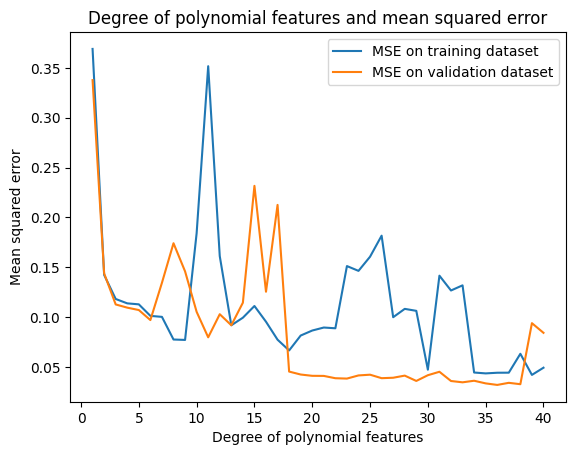

best degree 36


In [ ]:
# Function to find best polynomial degree
max_degree = 40

mse_train_list = np.full([max_degree + 1], np.nan)
mse_valid_list = np.full([max_degree + 1], np.nan)
degrees = range(1, max_degree+1)

for degree in degrees:
  model = LinearRegression()
  poly = PolynomialFeatures(degree=degree)
  scaler = StandardScaler()

  # Train
  poly.fit(X_train_raw)
  X_train_poly = poly.transform(X_train_raw)

  scaler.fit(X_train_poly)
  X_train = scaler.transform(X_train_poly)

  model.fit(X_train, y_train)

  y_train_pred = model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_train_pred)

  # Validate
  poly.fit(X_valid_raw)
  X_valid_poly = poly.transform(X_valid_raw)

  scaler.fit(X_valid_poly)
  X_valid = scaler.transform(X_valid_poly)

  model.fit(X_valid, y_valid)

  y_valid_pred = model.predict(X_valid)
  mse_valid = mean_squared_error(y_valid, y_valid_pred)

  # Store MSE for this degree value
  mse_train_list[degree] = mse_train
  mse_valid_list[degree] = mse_valid

plt.plot(degrees, mse_train_list[1:], label='MSE on training dataset')
plt.plot(degrees, mse_valid_list[1:], label='MSE on validation dataset')
plt.xlabel('Degree of polynomial features')
plt.ylabel('Mean squared error')
plt.title('Degree of polynomial features and mean squared error')
plt.legend()
plt.show()

best_degree = np.nanargmin(mse_valid_list)
print('best degree', best_degree)

MSE on the train data: 0.04419566110563455
MSE on the validation data: 0.06679064664684367
MSE on the test data: 0.06338487871033846
R2 score on the test data: 0.9418205564766731
R2 score on the valida data: 0.935299130363259
R2 score on the train data: 0.9537318616486822


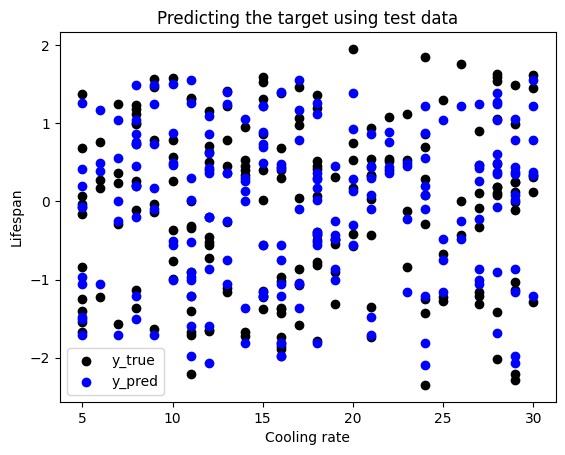

In [ ]:
# Applied using best polynomial degree
model = LinearRegression()
poly = PolynomialFeatures(degree=best_degree) # best_degree
scaler = StandardScaler()

# Training
poly.fit(X_train_raw)
X_train_poly = poly.transform(X_train_raw)

scaler.fit(X_train_poly)
X_train = scaler.transform(X_train_poly)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print('MSE on the train data:', mse_train)

# Validation
X_valid_poly = poly.transform(X_valid_raw)
X_valid = scaler.transform(X_valid_poly)
y_valid_pred = model.predict(X_valid)
mse_valid = mean_squared_error(y_valid, y_valid_pred)
y_train_valid = model.predict(X_train)
print('MSE on the validation data:', mse_valid)
# Test
X_test_poly = poly.transform(X_test)
X_test_sca = scaler.transform(X_test_poly)
y_test_pred = model.predict(X_test_sca)
mse_test = mean_squared_error(y_test, y_test_pred)
print('MSE on the test data:', mse_test)
print("R2 score on the test data:", r2_score(y_test, y_test_pred), )
print("R2 score on the valida data:", r2_score(y_valid, y_valid_pred), )
print("R2 score on the train data:", r2_score(y_train, y_train_valid), )
X_test_disp = X_valid_raw[:, 0]

plt.scatter(X_test_disp, y_test,  color='black', label='y_true') # Observed y values
plt.scatter(X_test_disp, y_test_pred, color='blue', label='y_pred') # predicted y values
plt.title('Predicting the target using test data')
plt.xlabel('Cooling rate')
plt.ylabel('Lifespan')
plt.legend()
plt.show()


**Regression Implementation using Ridge Regression Model**

MSE on training data: 0.11268626311455351
MSE on validation data: 0.11834933673704454
MSE on the test data: 0.13210379767674624
R2 score on the test data: 0.8781420623199918


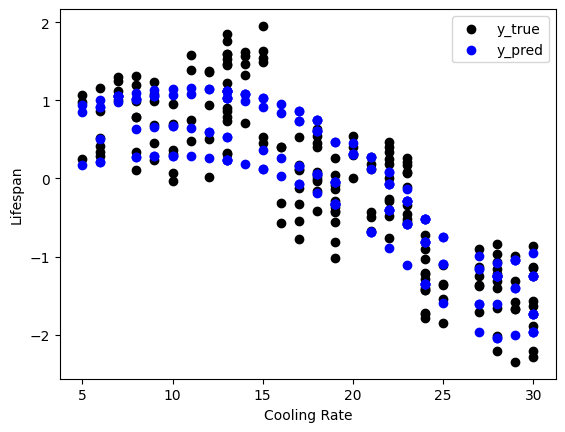

In [ ]:
# Initilizing the Ridge model
alpha = 1
model = Ridge(alpha=alpha)

#splitting data with different sizes
X_non_test_raw, X_test_raw, y_non_test, y_test = train_test_split(X, y_std, test_size=0.18, shuffle=True, random_state=0)
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X_non_test_raw, y_non_test, test_size=0.20, shuffle=True, random_state=0)

# Train
poly.fit(X_train_raw)
X_train_poly = poly.transform(X_train_raw)

scaler.fit(X_train_poly)
X_train = scaler.transform(X_train_poly)

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)

# Validate
X_valid_poly = poly.transform(X_valid_raw)
X_valid = scaler.transform(X_valid_poly)
y_pred_valid = model.predict(X_valid)
mse_valid = mean_squared_error(y_valid, y_pred_valid)

# Preprocess test data
X_test_poly = poly.transform(X_test_raw)
X_test = scaler.transform(X_test_poly)

# Predict test data
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print('MSE on training data:', mse_train)
print('MSE on validation data:', mse_valid)
print('MSE on the test data:', mse_test)
# The R2 score
print("R2 score on the test data:", r2_score(y_test, y_pred_test), )

# Plot outputs
plt.scatter(X_test_raw[:,0], y_test,  color='black', label='y_true')
plt.scatter(X_test_raw[:,0], y_pred_test, color='blue', label='y_pred')
plt.xlabel('Cooling Rate')
plt.ylabel('Lifespan')
plt.legend()
plt.show()



alpha: 1e-10, Validation mean squared error: 0.07995916932873262.
alpha: 1e-09, Validation mean squared error: 0.0817298133388264.
alpha: 1e-08, Validation mean squared error: 0.08255973955067061.
alpha: 1e-07, Validation mean squared error: 0.08609163028812206.
alpha: 1e-06, Validation mean squared error: 0.09435551044760143.
alpha: 1e-05, Validation mean squared error: 0.0971535220962178.
alpha: 0.0001, Validation mean squared error: 0.09926387087512777.
alpha: 0.001, Validation mean squared error: 0.11013259747713706.
alpha: 0.01, Validation mean squared error: 0.11743267941511712.
alpha: 0.1, Validation mean squared error: 0.11843584824450239.
alpha: 1.0, Validation mean squared error: 0.11973534871659414.
alpha: 10.0, Validation mean squared error: 0.13290490157272739.
alpha: 100.0, Validation mean squared error: 0.18025078271770112.
alpha: 1000.0, Validation mean squared error: 0.3031173370338296.
alpha: 10000.0, Validation mean squared error: 0.5551292490698617.
alpha: 100000.0,

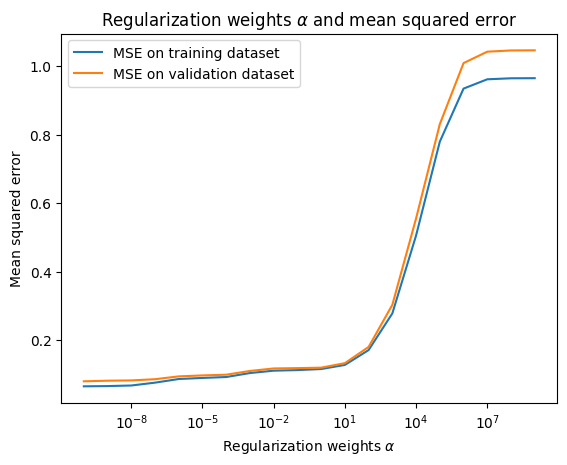

The best alpha: 1e-10
MSE on the test data: 0.08002939332765341
MSE on the validation data: 0.07995916932873262
MSE on the train data: 0.06532691281182981
R2 score on the train data: 0.9322666848776787
R2 score on the validation data: 0.9235364276760607
R2 score on the test data: 0.9261776194462372


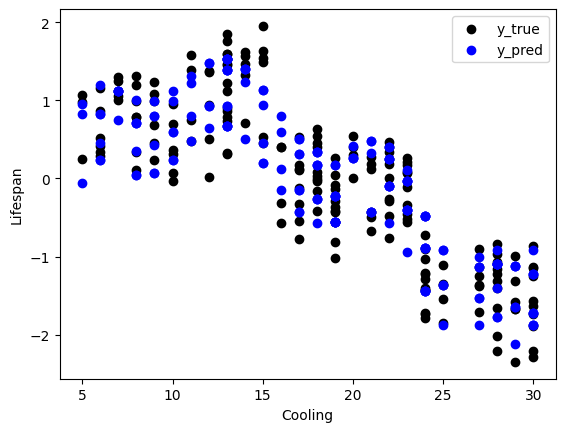

In [ ]:
#Choosing right alpha for Ridge regression
degree = 15
alpha_indices = np.arange(20)
alphas = 10.0 ** (alpha_indices -10)

mse_train_array = np.full([len(alphas)], np.nan)
mse_valid_array = np.full([len(alphas)], np.nan)

poly = PolynomialFeatures(degree=degree)

# preprocessing
poly.fit(X_train_raw)
X_train_poly = poly.transform(X_train_raw)

scaler.fit(X_train_poly)

X_train = scaler.transform(X_train_poly)
X_valid_poly = poly.transform(X_valid_raw)
X_valid = scaler.transform(X_valid_poly)


for alpha_index, alpha in zip(alpha_indices, alphas):
  # train
  model = Ridge(alpha=alpha)
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_pred_train)

  # Validation
  y_pred_valid = model.predict(X_valid)
  mse_valid = mean_squared_error(y_valid, y_pred_valid)

  # Store MSEs for this iteration
  mse_train_array[alpha_index] = mse_train
  mse_valid_array[alpha_index] = mse_valid
  print(f'alpha: {alpha}, Validation mean squared error: {mse_valid}.')

# Plot our graph of MSE for training and validation
plt.plot(alphas, mse_train_array, label='MSE on training dataset')
plt.plot(alphas, mse_valid_array, label='MSE on validation dataset')
plt.xlabel(r'Regularization weights $\alpha$')
plt.ylabel('Mean squared error')
plt.title(r'Regularization weights $\alpha$ and mean squared error')
plt.xscale('log')
plt.legend()
plt.show()

# Selecting best alpha
best_alpha_index = np.argmin(mse_valid_array)
best_alpha = alphas[best_alpha_index]
print('The best alpha:', best_alpha)

model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)

# Preprocess test data
X_test_poly = poly.transform(X_test_raw)
X_test = scaler.transform(X_test_poly)

# Predict test data
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print('MSE on the test data:', mse_test)
print('MSE on the validation data:', mean_squared_error(y_valid, model.predict(X_valid)))
print('MSE on the train data:', mean_squared_error(y_train, model.predict(X_train)))
# The R2 score
print("R2 score on the train data:", r2_score(y_train, model.predict(X_train)), )
print("R2 score on the validation data:", r2_score(y_valid, model.predict(X_valid)), )
print("R2 score on the test data:", r2_score(y_test, y_pred_test), )


# Plot outputs
plt.scatter(X_test_raw[:,0], y_test,  color='black', label='y_true') # Observed y values
plt.scatter(X_test_raw[:,0], y_pred_test, color='blue', label='y_pred') # predicted y values
plt.xlabel('Cooling')
plt.ylabel('Lifespan')
plt.legend()
plt.show()



**Regression Implementation using Lasso Model**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.328e+01, tolerance: 5.944e-02
  model = cd_fast.enet_coordinate_descent(


alpha: 1e-10, Validation mean squared error: 0.1253432347944262.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.328e+01, tolerance: 5.944e-02
  model = cd_fast.enet_coordinate_descent(


alpha: 1e-09, Validation mean squared error: 0.12534324299438862.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.327e+01, tolerance: 5.944e-02
  model = cd_fast.enet_coordinate_descent(


alpha: 1e-08, Validation mean squared error: 0.12534332521432753.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.319e+01, tolerance: 5.944e-02
  model = cd_fast.enet_coordinate_descent(


alpha: 1e-07, Validation mean squared error: 0.12534416008991375.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.237e+01, tolerance: 5.944e-02
  model = cd_fast.enet_coordinate_descent(


alpha: 1e-06, Validation mean squared error: 0.12535344554413902.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.479e+01, tolerance: 5.944e-02
  model = cd_fast.enet_coordinate_descent(


alpha: 1e-05, Validation mean squared error: 0.12543382080247.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.941e-01, tolerance: 5.944e-02
  model = cd_fast.enet_coordinate_descent(


alpha: 0.0001, Validation mean squared error: 0.12581255475470982.
alpha: 0.001, Validation mean squared error: 0.12697277979794314.
alpha: 0.01, Validation mean squared error: 0.15755450587887476.
alpha: 0.1, Validation mean squared error: 0.30323551107724445.
alpha: 1.0, Validation mean squared error: 0.946375097909696.
alpha: 10.0, Validation mean squared error: 0.946375097909696.
alpha: 100.0, Validation mean squared error: 0.946375097909696.
alpha: 1000.0, Validation mean squared error: 0.946375097909696.
alpha: 10000.0, Validation mean squared error: 0.946375097909696.
alpha: 100000.0, Validation mean squared error: 0.946375097909696.
alpha: 1000000.0, Validation mean squared error: 0.946375097909696.
alpha: 10000000.0, Validation mean squared error: 0.946375097909696.
alpha: 100000000.0, Validation mean squared error: 0.946375097909696.
alpha: 1000000000.0, Validation mean squared error: 0.946375097909696.


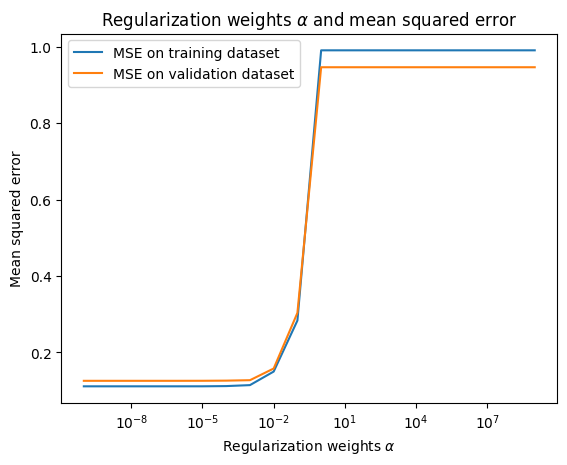

The best alpha: 1e-10


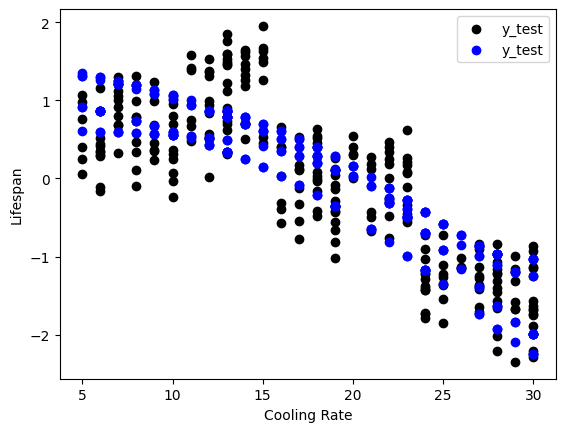

MSE on the train data: 0.18406987918143206
MSE on the validation data: 0.18770446691982456
MSE on the test data: 0.20305343799522718
R2 score on the train data: 0.8141979628509995
R2 score on the valid data: 0.801295496598458
R2 score on the test data: 0.8073362298773112


In [ ]:
# Split the data
X_non_test_raw, X_test_raw, y_non_test, y_test = train_test_split(X, y_std, test_size=0.25, shuffle=True, random_state=0)
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X_non_test_raw, y_non_test, test_size=0.20, shuffle=True, random_state=0)

###################################
# Initialise Model and preprocessors
###################################

degree = 13
alpha_indices = np.arange(20)
alphas = 10.0 ** (alpha_indices -10)

mse_train_array = np.full([len(alphas)], np.nan)
mse_valid_array = np.full([len(alphas)], np.nan)

poly = PolynomialFeatures(degree=degree)


# preprocessing
poly.fit(X_train_raw)
X_train_poly = poly.transform(X_train_raw)

scaler.fit(X_train_poly)
X_train = scaler.transform(X_train_poly)
X_valid_poly = poly.transform(X_valid_raw)
X_valid = scaler.transform(X_valid_poly)


for alpha_index, alpha in zip(alpha_indices, alphas):
  model = Lasso(alpha=alpha, max_iter=10000)
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_pred_train)

  # Validation
  y_pred_valid = model.predict(X_valid)
  mse_valid = mean_squared_error(y_valid, y_pred_valid)

  mse_train_array[alpha_index] = mse_train
  mse_valid_array[alpha_index] = mse_valid
  print(f'alpha: {alpha}, Validation mean squared error: {mse_valid}.')

# Plot our graph of MSE for training and validation
plt.plot(alphas, mse_train_array, label='MSE on training dataset')
plt.plot(alphas, mse_valid_array, label='MSE on validation dataset')
plt.xlabel(r'Regularization weights $\alpha$')
plt.ylabel('Mean squared error')
plt.title(r'Regularization weights $\alpha$ and mean squared error')
plt.xscale('log')
plt.legend()
plt.show()


best_alpha_index = np.argmin(mse_valid_array)
best_alpha = alphas[best_alpha_index]
print('The best alpha:', best_alpha)

model = Lasso(alpha=best_alpha, max_iter=1000, tol=1e-1)
model.fit(X_train, y_train)

# Preprocess test data
X_test_poly = poly.transform(X_test_raw)
X_test = scaler.transform(X_test_poly)

# Predict test data
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

# Plot outputs
plt.scatter(X_test_raw[:,0], y_test,  color='black', label='y_test') # Observed y values
plt.scatter(X_test_raw[:,0], y_pred_test, color='blue', label='y_test') # predicted y values
plt.xlabel('Cooling Rate')
plt.ylabel('Lifespan')
plt.legend()
plt.show()

print('MSE on the train data:', mean_squared_error(y_train, model.predict(X_train)))
print('MSE on the validation data:', mean_squared_error(y_valid, model.predict(X_valid)))
print('MSE on the test data:', mse_test)
# The R2 score
print("R2 score on the train data:", r2_score(y_train, model.predict(X_train)), )
print("R2 score on the valid data:", r2_score(y_valid, model.predict(X_valid)), )
print("R2 score on the test data:", r2_score(y_test, y_pred_test), )

# Part 4 – Binary Classification Implementation






**Part 4 Binary Classification Implementation**

In [6]:
#preparing the data
dataset_for_part4 = original_data.copy()

label_encoder = LabelEncoder()
dataset_for_part4["mcrstr"] = label_encoder.fit_transform(dataset_for_part4['microstructure'])
dataset_for_part4["partTypeLabel"] = label_encoder.fit_transform(dataset_for_part4['partType'])
dataset_for_part4["castTypeLabel"] = label_encoder.fit_transform(dataset_for_part4['castType'])
dataset_for_part4["seedLocationLabel"] = label_encoder.fit_transform(dataset_for_part4['seedLocation'])

display(dataset_for_part4.head())

features_binary = ["coolingRate", "quenchTime"] # "coolingRate", "partTypeLabel", "quenchTime", "forgeTime", "smallDefects", "mcrstr", "castTypeLabel", "seedLocationLabel"
binary_target = ["Lifespan"]

dataset_for_part4['Lifespan'] = dataset_for_part4["Lifespan"].apply(lambda lifespan: 1 if lifespan > 1500 else 0)

y = np.array(dataset_for_part4[binary_target]).ravel()
X =  np.array(dataset_for_part4[features_binary])

# lifespan_list = np.array(dataset_for_part4[features_binary])
# y = [1 if lifespan > 1500 else 0 for lifespan in lifespan_list]

X_non_test_raw, X_test_raw, y_non_test, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=0)
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X_non_test_raw, y_non_test, test_size=0.25, shuffle=True, random_state=0)

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType,mcrstr,partTypeLabel,castTypeLabel,seedLocationLabel
0,284.161690,Blade,colGrain,25,4.460592,7.937116,22,0,7,Top,Investment,0,0,2,1
1,1599.551748,Blade,singleGrain,9,1.425973,2.432948,2,0,0,Bottom,Die,2,0,1,0
2,768.311031,Nozzle,colGrain,26,2.508879,3.841211,25,0,0,Bottom,Investment,0,2,2,0
3,1697.663828,Blade,colGrain,12,3.248913,2.610700,10,0,0,Bottom,Continuous,0,0,0,0
4,1491.478862,Nozzle,colGrain,20,1.901670,4.634926,24,0,0,Top,Die,0,2,1,1


**Binary Classification using Naive Bayes**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 83.30%


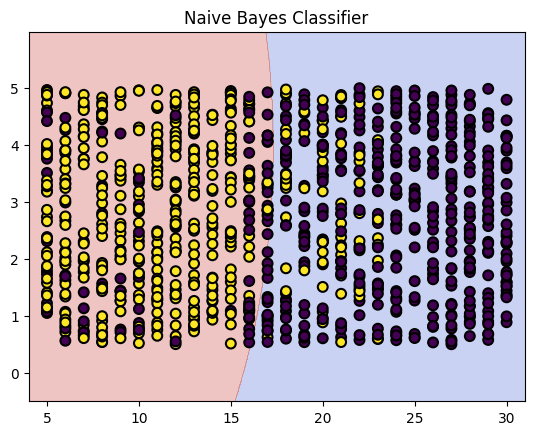

In [7]:
model = GaussianNB() # Create our prediction model object
scaler = StandardScaler() # Here is our standardisation object

y = np.array(dataset_for_part4[binary_target])
X =  np.array(dataset_for_part4[features_binary])

model.fit(X, y)

y_pred = model.predict(X)


accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use model to plot the decision boundary for all points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

# Plot observed points and add text
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=50, linewidth=1.5)
plt.title(f'Naive Bayes Classifier')
plt.show()


**Binary Classification using Logistic Regression**

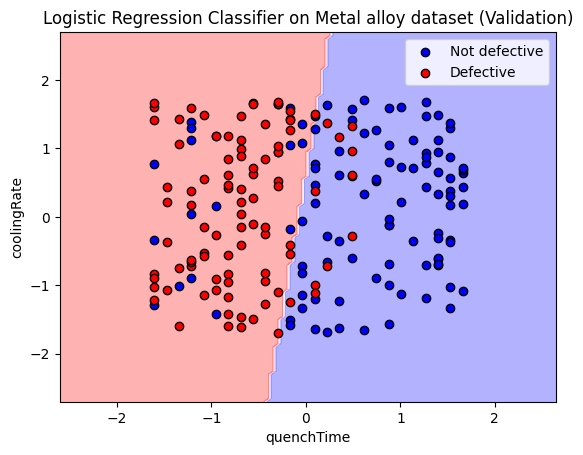

Accuracy: 0.8600
Precision: 0.8333
Recall: 0.8854
F1 Score: 0.8586
Balanced Accuracy: 0.8610
Macro averaged F1 Score: 0.8600
Weighted averaged F1 Score: 0.8600
Confusion matrix: 
 [[0.435 0.085]
 [0.055 0.425]]
(#########################)
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       104
           1       0.83      0.89      0.86        96

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200


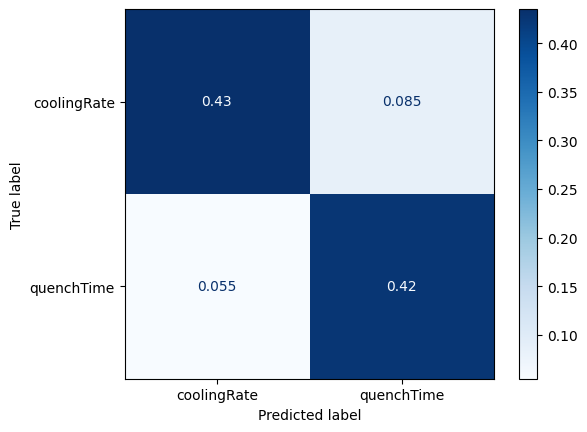

In [8]:
model = LogisticRegression(C=100)
scaler = StandardScaler()

# Train
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)

model.fit(X_train, y_train)

# Validation
X_valid = scaler.transform(X_valid_raw)
y_pred_valid = model.predict(X_valid)

# Plot outputs
#Create a meshgrid to plot the decision boundary
x_min, x_max = X_valid[:, 0].min() - 1, X_valid[:, 0].max() + 1
y_min, y_max = X_valid[:, 1].min() - 1, X_valid[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

#Predict the class labels for the points in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


#Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.35, cmap = 'bwr')

X_def = X_valid[y_valid==1, :]
X_not_def = X_valid[y_valid==0, :]

plt.scatter(X_not_def[:, 0], X_not_def[:, 1], color='blue', edgecolors='black', label='Not defective')
plt.scatter(X_def[:, 0], X_def[:, 1], color='red', edgecolors='black', label='Defective')


plt.ylabel('coolingRate')
plt.xlabel('quenchTime')

# Show the plot
plt.title(f'Logistic Regression Classifier on Metal alloy dataset (Validation)')
plt.legend()
plt.show()

# The accuracy score: 1 for perfect prediction
print('Accuracy: {:.4f}'.format(accuracy_score(y_valid, y_pred_valid)))
print('Precision: {:.4f}'.format(precision_score(y_valid, y_pred_valid)))
print('Recall: {:.4f}'.format(recall_score(y_valid, y_pred_valid)))
print('F1 Score: {:.4f}'.format(f1_score(y_valid, y_pred_valid)))
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_valid, y_pred_valid)))
print('Macro averaged F1 Score: {:.4f}'.format(f1_score(y_valid, y_pred_valid, average='macro')))
print('Weighted averaged F1 Score: {:.4f}'.format(f1_score(y_valid, y_pred_valid, average='weighted')))

# Confusion matrix
confusion_mat = confusion_matrix(y_valid, y_pred_valid, normalize='all')
print(f'Confusion matrix: \n', confusion_mat)

# Visualize the confusion matrix
ConfusionMatrixDisplay(confusion_mat, display_labels=['coolingRate', 'quenchTime']).plot(cmap=plt.cm.Blues)
plt.grid(False)
print("(#########################)")
# The classification report, which contains accuracy, precision, recall, F1 score
# Note, the Precision/Recall/F1 in the report match the positive class (1.0) in the report
print(classification_report(y_valid, y_pred_valid))

C: 1e-10, f1 score: 0.0.
C: 1e-09, f1 score: 0.0.
C: 1e-08, f1 score: 0.0.
C: 1e-07, f1 score: 0.0.
C: 1e-06, f1 score: 0.0.
C: 1e-05, f1 score: 0.0.
C: 0.0001, f1 score: 0.0.
C: 0.001, f1 score: 0.7411764705882353.
C: 0.01, f1 score: 0.8571428571428572.
C: 0.1, f1 score: 0.8571428571428572.
C: 1.0, f1 score: 0.8585858585858586.
C: 10.0, f1 score: 0.8585858585858586.
C: 100.0, f1 score: 0.8585858585858586.
C: 1000.0, f1 score: 0.8585858585858586.
C: 10000.0, f1 score: 0.8585858585858586.
C: 100000.0, f1 score: 0.8585858585858586.
C: 1000000.0, f1 score: 0.8585858585858586.
C: 10000000.0, f1 score: 0.8585858585858586.
C: 100000000.0, f1 score: 0.8585858585858586.
C: 1000000000.0, f1 score: 0.8585858585858586.

The best C: 1.0


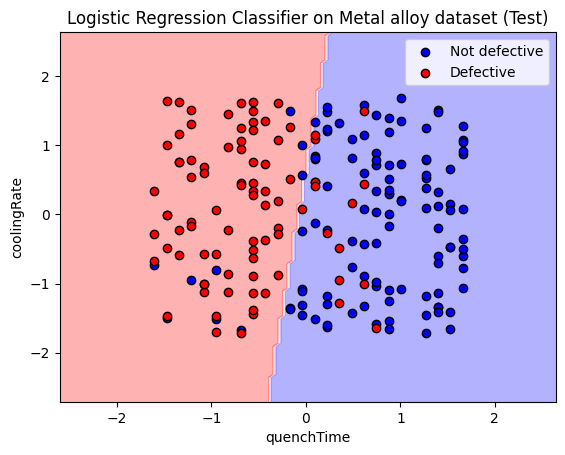

Accuracy: 0.8750
Confusion matrix: 
 [[0.52  0.05 ]
 [0.075 0.355]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       114
           1       0.88      0.83      0.85        86

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200


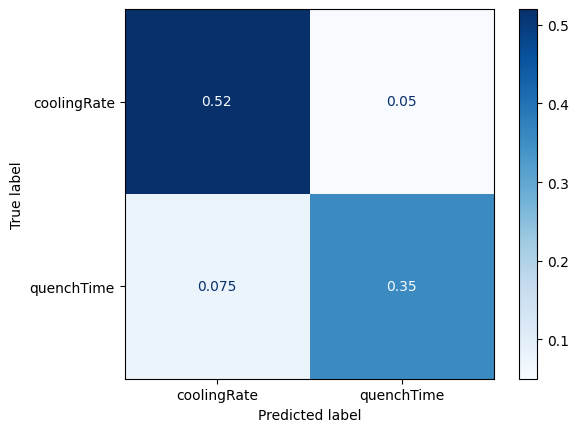

In [ ]:
C_indices = np.arange(20) # Get a list of 1-20
Cs = 10.0 ** ( C_indices-10) # Define a list of Cs by taking indices from 10 to -10
# Get the F1 score arrays
# Note that we could be monitoring any of the other metrics to choose our model.
#I have chosen f1 here as it give a balanced penalisation of accuracy and recall, but for your case you may care about maximising another metric
f1_train_array = np.full([len(Cs)], np.nan)
f1_valid_array = np.full([len(Cs)], np.nan)

scaler = StandardScaler()

scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_valid = scaler.transform(X_valid_raw)

# Loop to test C values
for C_index, C in zip(C_indices, Cs):
  # train
  model = LogisticRegression(C=C) # fits our Logistic Regression model with a new regularisation weight each iteration
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  f1_train = f1_score(y_train, y_pred_train)

  # Validation
  y_pred_valid = model.predict(X_valid)
  f1_valid = f1_score(y_valid, y_pred_valid)

  # Store f1s for this iteration
  f1_train_array[C_index] = f1_train
  f1_valid_array[C_index] = f1_valid
  print(f'C: {C}, f1 score: {f1_valid}.')

# Select our best performing C (highest f1)
best_c_index = np.nanargmax(f1_valid_array)
best_C = Cs[best_c_index]
print(f'\nThe best C:', best_C)

############
# Test
############

model = LogisticRegression(C=best_C) # fits our Logistic Reg model with the best weight
model.fit(X_train, y_train)

# Preprocess test data
X_test = scaler.transform(X_test_raw)
# Predict test data
y_pred_test = model.predict(X_test)

# Plot outputs
# Create a meshgrid to plot the decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

# Predict the class labels for the points in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.35, cmap = 'bwr')
X_def = X_test[y_test==1, :]
X_not_def = X_test[y_test==0, :]

plt.scatter(X_not_def[:, 0], X_not_def[:, 1], color='blue', edgecolors='black', label='Not defective')
plt.scatter(X_def[:, 0], X_def[:, 1], color='red', edgecolors='black', label='Defective')

plt.ylabel('coolingRate')
plt.xlabel('quenchTime')

plt.title(f'Logistic Regression Classifier on Metal alloy dataset (Test)')
plt.legend()
plt.show()

# The accuracy score: 1 for perfect prediction
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_test)))
# Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_test, normalize='all')
print(f'Confusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
ConfusionMatrixDisplay(confusion_mat, display_labels=['coolingRate', 'quenchTime']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(classification_report(y_test, y_pred_test))


#Part 5 – Convolutional Neural Network Implementation

In [ ]:
import numpy as np # A useful package for dealing with mathematical processes, we will be using it this week for vectors and matrices.
import pandas as pd # A common package for viewing tabular data
import matplotlib.pyplot as plt # We will be using Matplotlib for our graphs
import os # we use this to oad things from the local file system
from sklearn.model_selection import train_test_split # A library that can automatically perform data splitting for us
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report, balanced_accuracy_score # Various classification metrics we may find useful

import tensorflow as tf # loads all of tensorflow. This gives us access to everything, but we need to call the correct library
from tensorflow import keras # karas is a hgiher level library built on tensorflow. Most of what we are doing is actually using keras.
from tensorflow.keras import layers, datasets, models # Import the different model layers and datasets
import tensorflow_datasets as tfds # An alternate way to load tensorflow datasets
from tensorflow.keras.preprocessing.image import load_img, img_to_array # Some tensofrlow preprocessing librarie we need to load in local image files
from keras.models import Model # We'll be using the functional/graphical api for our CNNs
%matplotlib inline

In [ ]:
!unzip COMP1801_CourseworkDataset2_images.zip

Archive:  COMP1801_CourseworkDataset2_images.zip
   creating: COMP1801_CourseworkDataset2_images/
  inflating: COMP1801_CourseworkDataset2_images/COMP1801_CourseworkDataset2_images_metadata.csv  
  inflating: COMP1801_CourseworkDataset2_images/scan_0.png  
  inflating: COMP1801_CourseworkDataset2_images/scan_1.png  
  inflating: COMP1801_CourseworkDataset2_images/scan_10.png  
  inflating: COMP1801_CourseworkDataset2_images/scan_100.png  
  inflating: COMP1801_CourseworkDataset2_images/scan_101.png  
  inflating: COMP1801_CourseworkDataset2_images/scan_102.png  
  inflating: COMP1801_CourseworkDataset2_images/scan_103.png  
  inflating: COMP1801_CourseworkDataset2_images/scan_104.png  
  inflating: COMP1801_CourseworkDataset2_images/scan_105.png  
  inflating: COMP1801_CourseworkDataset2_images/scan_106.png  
  inflating: COMP1801_CourseworkDataset2_images/scan_107.png  
  inflating: COMP1801_CourseworkDataset2_images/scan_108.png  
  inflating: COMP1801_CourseworkDataset2_images/scan_

In [ ]:

# Load metadata from the CSV file - this allows us to know what class each picture belongs to.
metadata = pd.read_csv("COMP1801_CourseworkDataset2_images/COMP1801_CourseworkDataset2_images_metadata.csv")

# Define the directory where your images are located (in colab in our case)
image_directory = "/content/COMP1801_CourseworkDataset2_images/"

# Define image size - this means we can rescale all our images to be the same size
image_size = (128, 128)

# Create lists to store image data and labels
images = []
labels = []

# Load and preprocess images
for index, row in metadata.iterrows():
    image_path = os.path.join(image_directory, row['Image Filename'])
    image = load_img(image_path, target_size=image_size)
    image_array = img_to_array(image) / 255.0  # Normalize pixel values to [0, 1]
    images.append(image_array)
    labels.append(row['Type'])

print(len(images), len(labels))

class_mapping = {'None': 0, 'Multiple': 1, 'Large': 2, 'Splinter': 3}
labels = [class_mapping[label] for label in labels]

images = np.array(images)
labels = np.array(labels)


1000 1000


In [ ]:
#  Splitting the data
X_non_test, X_test, y_non_test, y_test = train_test_split(images, labels, test_size=1/10, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_non_test, y_non_test, test_size=1/9, random_state=42)

In [ ]:
desired_image_size = (128, 128)
inputs = tf.keras.Input(shape=desired_image_size + (3,))

x = layers.Rescaling(1.0 / 255, offset=0)(inputs)

#first try
# x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
# x = layers.MaxPooling2D((2, 2))(x)
# x = layers.Conv2D(64, (3, 3), activation='relu')(x)
# x = layers.MaxPooling2D((2, 2))(x)
# x = layers.Conv2D(128, (3, 3), activation='relu')(x)
# x = layers.MaxPooling2D((2,2))(x)


# second try
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)

# x = layers.Conv2D(64, (3, 3), activation='relu')(inputs)
# x = layers.MaxPooling2D((2, 2))(x)


x = layers.Conv2D(64, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)


x = layers.Conv2D(128, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(256, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)

# third try
# x = layers.Conv2D(64, (3, 3), activation='relu')(x)
# x = layers.MaxPooling2D((2, 2))(x)
# x = layers.Conv2D(128, (3, 3), activation='relu')(x)
# x = layers.MaxPooling2D((2,2))(x)
# x = layers.Flatten()(x)

x = layers.Flatten()(x)

# outputs = layers.Dense(40, activation="softmax")(x)
# outputs = layers.Dense(30, activation="softmax")(x)
# outputs = layers.Dense(20, activation="softmax")(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 126, 126, 256)     7168      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 256)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1016064)           0         
                                                                 
 dense (Dense)               (None, 4)                 4064260   
                                                                 
Total params: 4071428 (15.53 MB)
Trainable params: 4071428 (15.53 MB)
Non-trainable params: 0 (0.00 Byte)
_____________________

Epoch 1/200
8/8 [==============================] - 6s 161ms/step - loss: 10.6208 - accuracy: 0.4663 - val_loss: 3.5166 - val_accuracy: 0.2900
Epoch 2/200
8/8 [==============================] - 1s 133ms/step - loss: 1.3193 - accuracy: 0.6525 - val_loss: 1.1109 - val_accuracy: 0.7400
Epoch 3/200
8/8 [==============================] - 1s 132ms/step - loss: 0.7965 - accuracy: 0.8200 - val_loss: 0.8026 - val_accuracy: 0.8400
Epoch 4/200
8/8 [==============================] - 1s 132ms/step - loss: 0.5693 - accuracy: 0.7837 - val_loss: 0.6681 - val_accuracy: 0.7700
Epoch 5/200
8/8 [==============================] - 1s 135ms/step - loss: 0.4823 - accuracy: 0.8225 - val_loss: 0.7635 - val_accuracy: 0.8400
Epoch 6/200
8/8 [==============================] - 1s 134ms/step - loss: 0.3966 - accuracy: 0.8788 - val_loss: 0.6721 - val_accuracy: 0.7500
Epoch 7/200
8/8 [==============================] - 1s 134ms/step - loss: 0.2841 - accuracy: 0.9337 - val_loss: 0.5779 - val_accuracy: 0.8400
Epoch 8/200


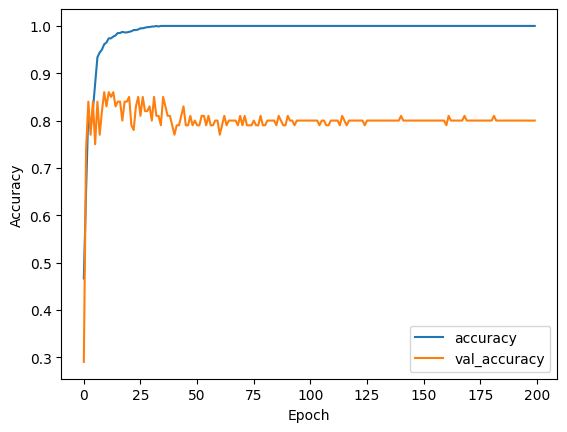

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=100, validation_data=(X_valid, y_valid))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

4/4 [==============================] - 0s 11ms/step - loss: 0.9554 - accuracy: 0.8300
Validation loss: 1.1021
Validation accuracy: 0.8000
Test loss: 0.9554
Test accuracy: 0.8300
4/4 [==============================] - 0s 11ms/step
The accuracy on the test data: 0.83
The F1 score on the test data: 0.5568701723113487
Precision on test data: 0.5880360333531864
Recall on test data: 0.5503246753246753


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 11ms/step


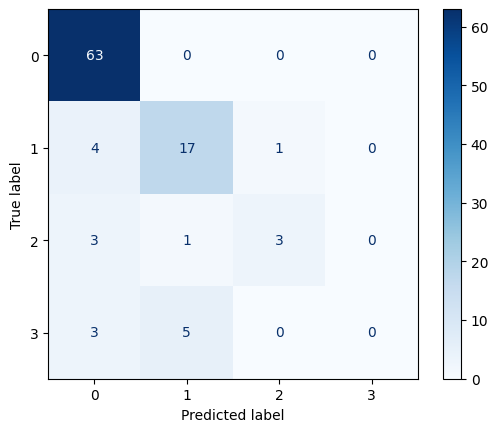

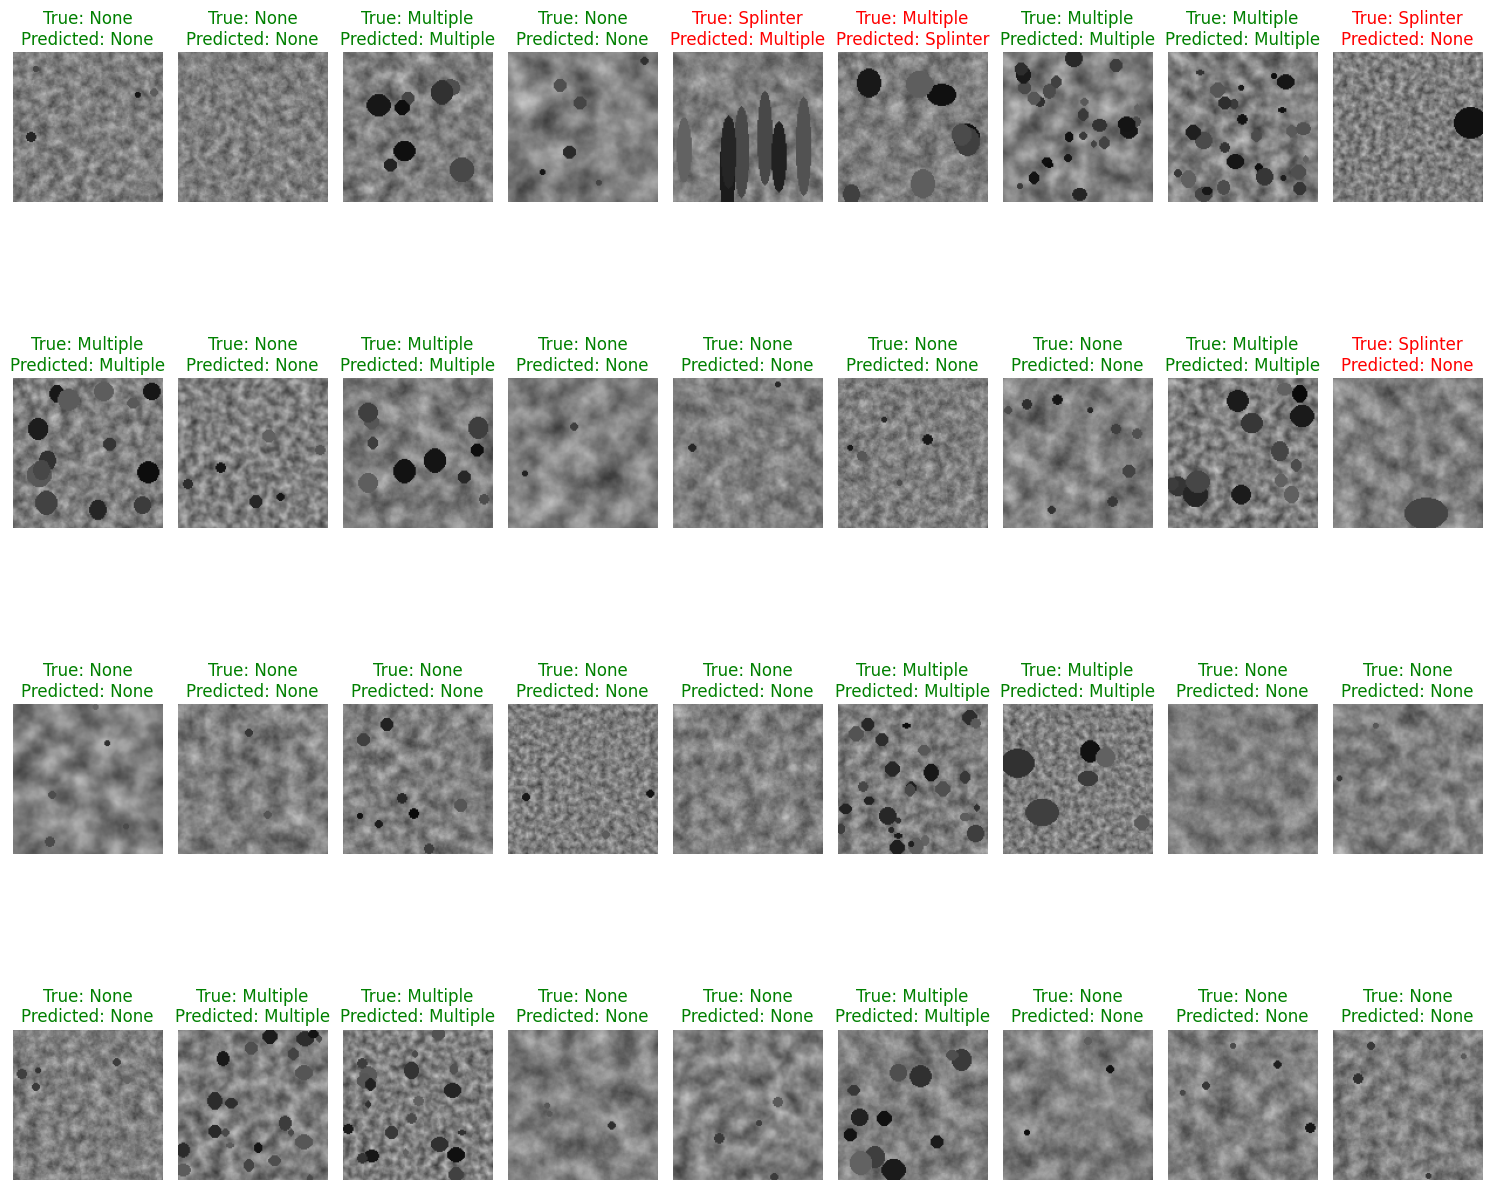

In [ ]:
validation_loss, validation_accuracy = model.evaluate(X_valid, y_valid)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Validation loss: {validation_loss:.4f}")
print(f"Validation accuracy: {validation_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

pred_labels = model.predict(X_test)
pred_labels = np.argmax(pred_labels, axis=1)

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels))
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)

acc_test = accuracy_score(y_test, pred_labels)
f1_test = f1_score(y_test, pred_labels, average='macro')
print('The accuracy on the test data:', acc_test)
print('The F1 score on the test data:', f1_test)
pre_test = precision_score(y_test, pred_labels, average='macro')
print('Precision on test data:', pre_test)
reca_test = recall_score(y_test, pred_labels, average='macro')
print('Recall on test data:', reca_test)


# Define the number of rows and columns for image visualization
num_images_to_visualize = 36

num_rows = 4
num_columns = num_images_to_visualize // num_rows

# Get a random subset of images from the validation set
subset_indices = np.random.choice(36, num_images_to_visualize, replace=False)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 14))

predicted_prob = model.predict(X_test)
predicted_classes = np.argmax(predicted_prob, axis=1)

def get_label(value):
  if value == class_mapping['None']:
    return "None"
  elif value == class_mapping['Multiple']:
    return "Multiple"
  elif value == class_mapping['Multiple']:
    return "Large"
  else:
    return "Splinter"

# Loop through the subset of images
for i, index in enumerate(subset_indices):
    row = i // num_columns
    col = i % num_columns

    imd=(X_test[index]*255).astype(np.uint8)

    # Plot the image
    axes[row, col].imshow(imd)
    axes[row, col].axis('off')

    # Set the title with both true and predicted labels
    title = f"True: {get_label(y_test[index])}\nPredicted: {get_label(predicted_classes[index])}"
    axes[row, col].set_title(title, color="green" if y_test[index] == predicted_classes[index] else "red")

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()

# Part 6 – Clustering Implementation

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
dataset_for_part6 = original_data.copy()
label_encoder = LabelEncoder()
dataset_for_part6["mcrstr"] = label_encoder.fit_transform(dataset_for_part6['microstructure'])
dataset_for_part6["partTypeLabel"] = label_encoder.fit_transform(dataset_for_part6['partType'])
dataset_for_part6["castTypeLabel"] = label_encoder.fit_transform(dataset_for_part6['castType'])
dataset_for_part6["seedLocationLabel"] = label_encoder.fit_transform(dataset_for_part6['seedLocation'])
display(dataset_for_part6.head())

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType,mcrstr,partTypeLabel,castTypeLabel,seedLocationLabel
0,284.161690,Blade,colGrain,25,4.460592,7.937116,22,0,7,Top,Investment,0,0,2,1
1,1599.551748,Blade,singleGrain,9,1.425973,2.432948,2,0,0,Bottom,Die,2,0,1,0
2,768.311031,Nozzle,colGrain,26,2.508879,3.841211,25,0,0,Bottom,Investment,0,2,2,0
3,1697.663828,Blade,colGrain,12,3.248913,2.610700,10,0,0,Bottom,Continuous,0,0,0,0
4,1491.478862,Nozzle,colGrain,20,1.901670,4.634926,24,0,0,Top,Die,0,2,1,1


,Lifespan,forgeTime,quenchTime
0,284.161690,7.937116,4.460592
1,1599.551748,2.432948,1.425973
2,768.311031,3.841211,2.508879
3,1697.663828,2.610700,3.248913
4,1491.478862,4.634926,1.901670


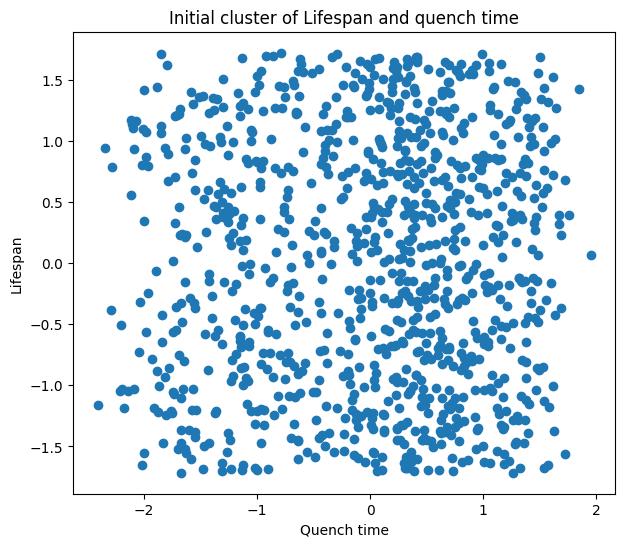

In [ ]:
continuous_vars = ['Lifespan', 'forgeTime', 'quenchTime']
display(dataset_for_part6[continuous_vars].head())
# Selecting a subset of data with continuous variables
subset_data = np.array(dataset_for_part6[continuous_vars])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_data)

plt.figure(figsize=(7,6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1]);
plt.title('Initial cluster of Lifespan and quench time')
plt.xlabel('Quench time')
plt.ylabel('Lifespan')

plt.show()

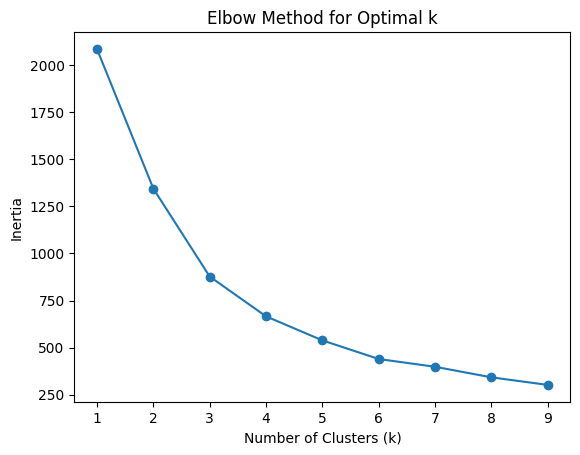

In [ ]:
# Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=2)
scaled_data = pca.fit_transform(scaled_data)

# Perform k-means clustering for different values of k
k_values = range(1, 10)  # You can adjust the range based on your preference
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


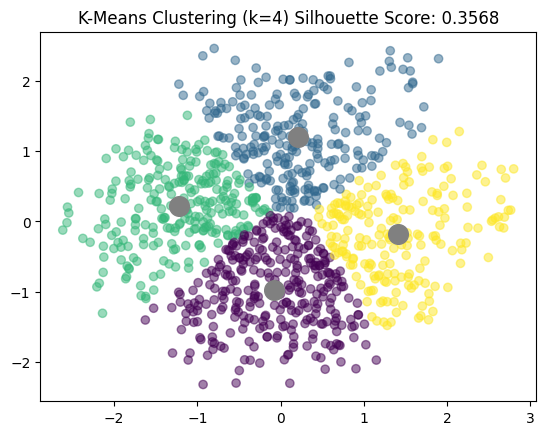

In [ ]:
# Choose the optimal k (e.g., from the elbow plot)
optimal_k = 4

# Fit k-means with the optimal k
model = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = model.fit_predict(scaled_data)

score = silhouette_score(scaled_data, cluster_labels)

# Visualize the clusters in the reduced space (PCA)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='grey', s=200);
plt.title(f'K-Means Clustering (k={optimal_k}) Silhouette Score: {score:.4f}')
plt.show()

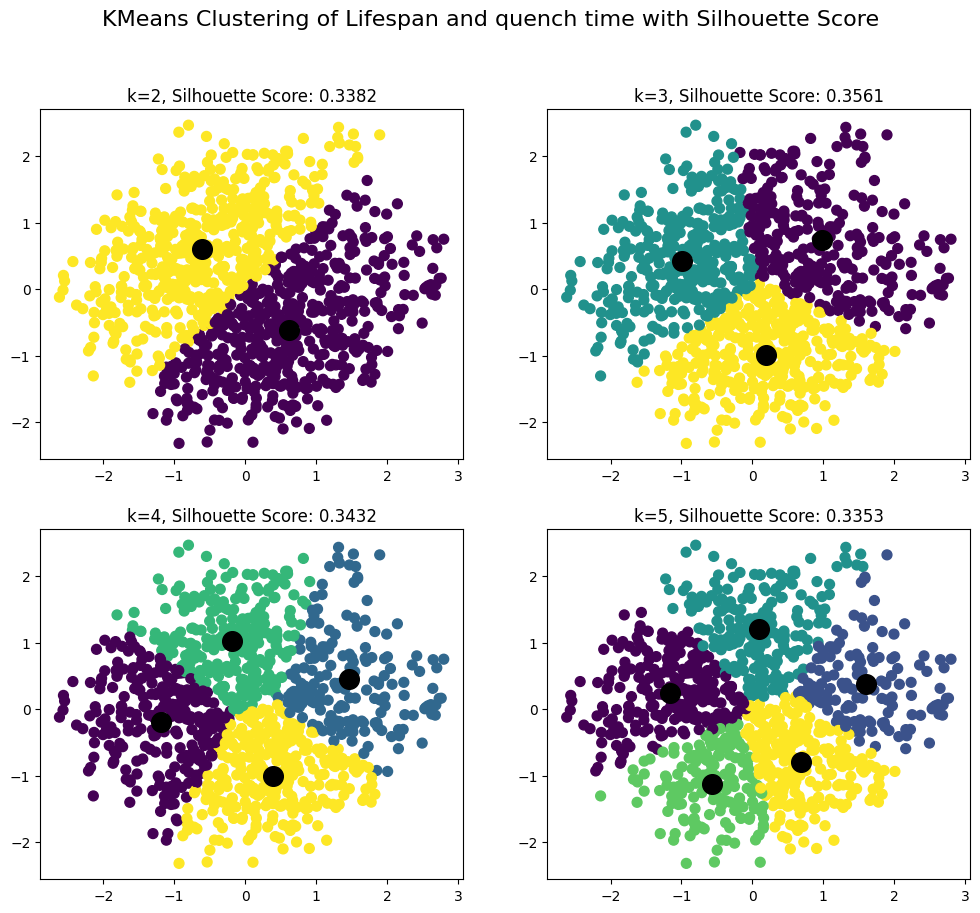

In [ ]:
# Set up the subplot layout
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('KMeans Clustering of Lifespan and quench time with Silhouette Score', fontsize=16)
axs = axs.flatten() # Flatten the axs array for easy indexing

for k in range(2, 6):
    # KMeans clustering
    model = KMeans(n_clusters=k, n_init='auto')
    cluster_labels = model.fit_predict(scaled_data)

    # Silhouette Score
    score = silhouette_score(scaled_data, cluster_labels)

    # Scatter Plot
    axs[k-2].scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, s=50, cmap='viridis')
    axs[k-2].scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='black', s=200);
    axs[k-2].set_title(f'k={k}, Silhouette Score: {score:.4f}')

plt.show()